In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utilities as utl
from Regression_Class import Regressor as Reg

sns.set(style='whitegrid')
sns.set_palette('muted')
#plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv(
    "C:\\Users\\wince\\Google Drive\\DATA SCIENCE\\LEZIONI\\ML\\Polignano\\01.REGRESSION\\DataEx_LinRegression\\heart.arff.csv",
    delimiter=',')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [5]:
df.groupby('target').std()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762
1,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752


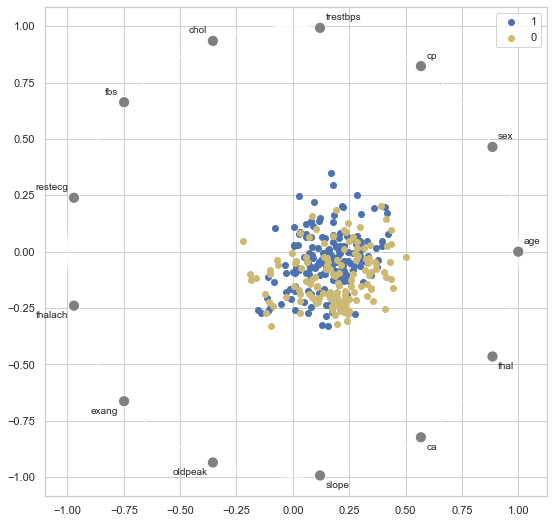

In [45]:
plt.figure(figsize=(9,9))
pd.plotting.radviz(df, 'target', color=('b','y'));

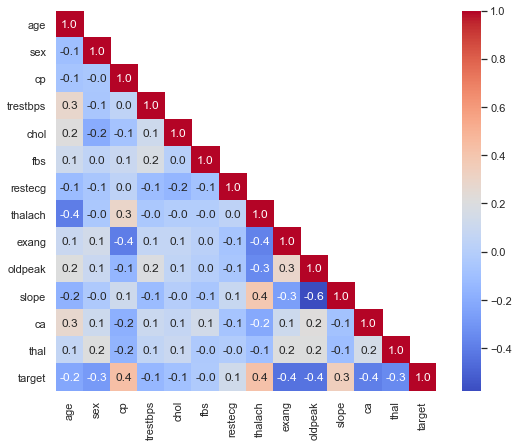

In [7]:
utl.corr_matrix(df)

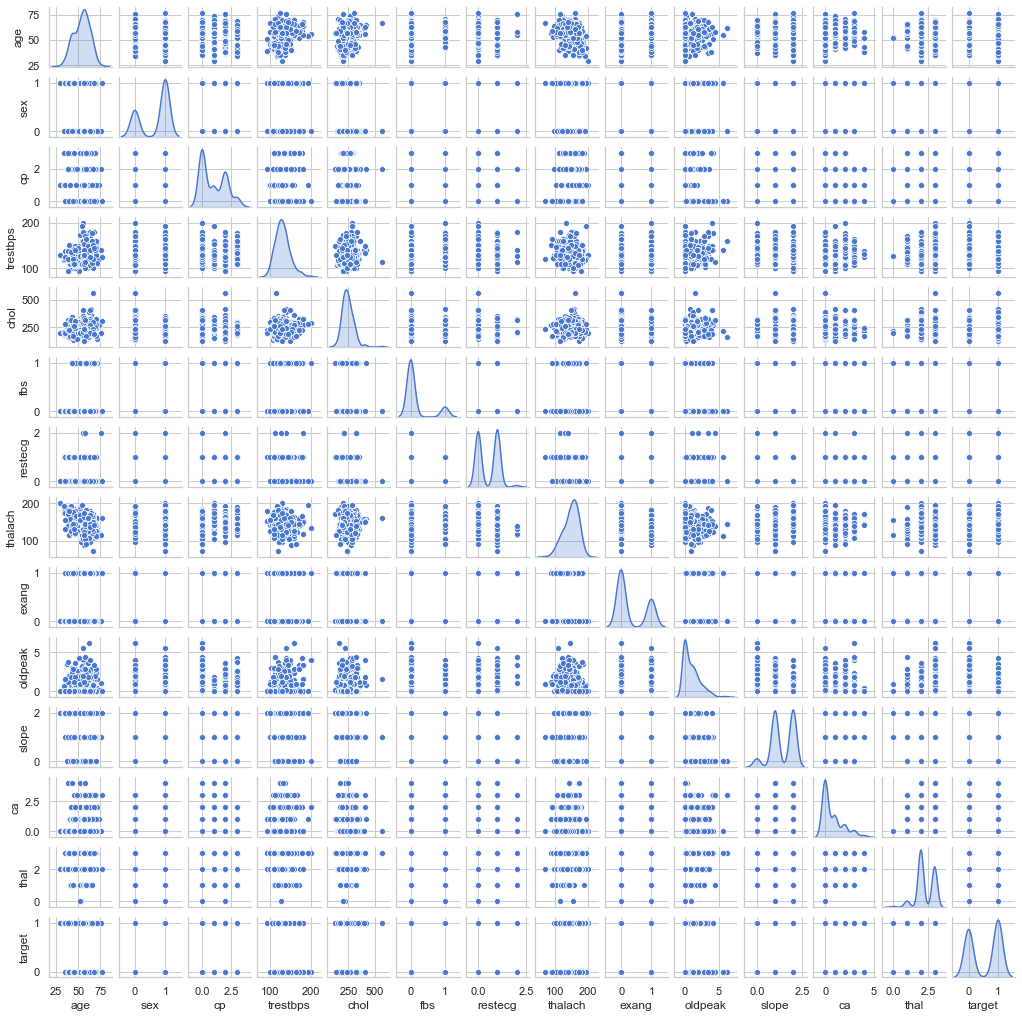

In [44]:
sns.pairplot(df, diag_kind='kde', height=1., kind='scatter');

In [43]:
df_mix = df.copy()

In [10]:
cat_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
df_mix[cat_col] = df_mix[cat_col].astype('category')
num_col = df_mix.columns[df_mix.dtypes != 'category']

In [11]:
df_mix.describe(include='number')

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [12]:
df_mix.describe(include='category')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


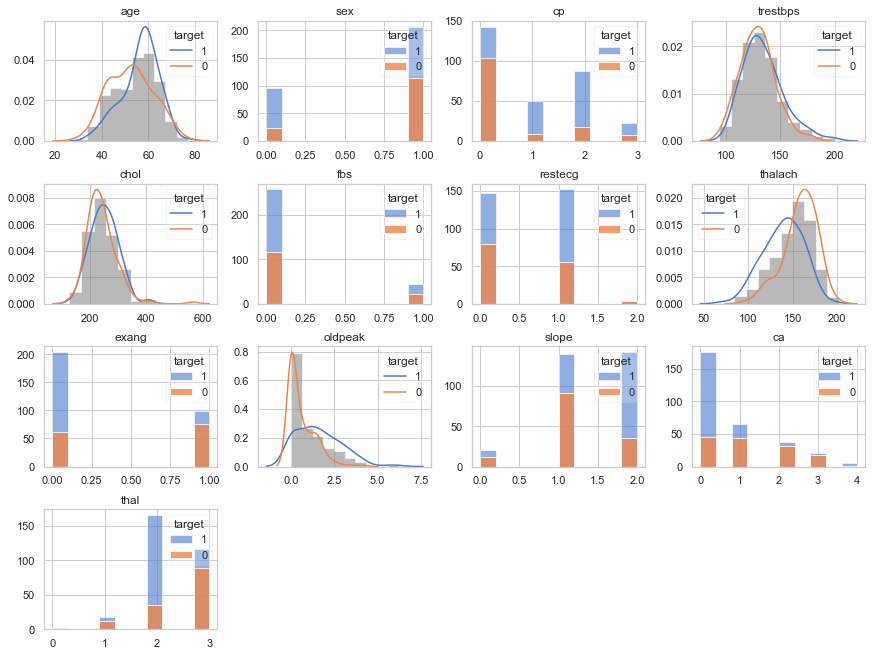

In [13]:
utl.hist(df_mix, ref='target', bins=10)

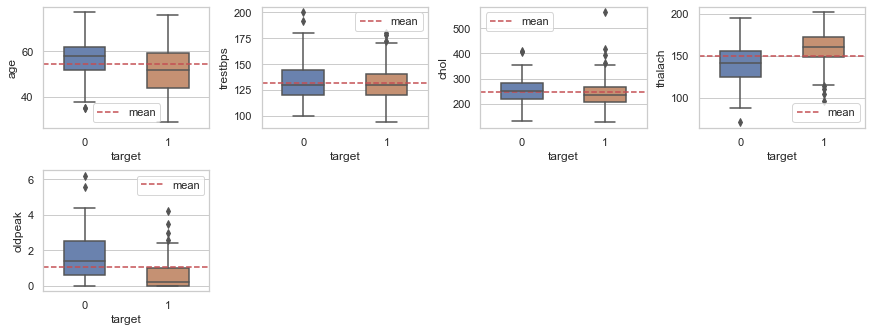

In [14]:
utl.var_vs_target(df_mix, kind='number', ref='target')

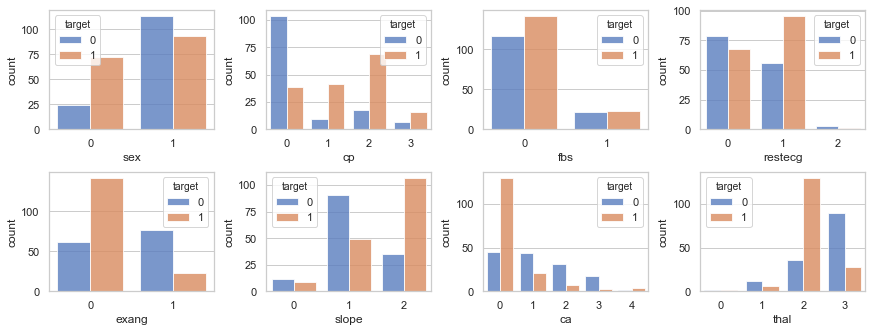

In [15]:
utl.var_vs_target(df_mix, kind='category', ref='target', alpha=.8)

In [16]:
df_mix.pivot_table(index=['sex','ca'], values='target', columns=['cp'], aggfunc='count', margins=1)

cp          0     1     2     3  All
sex ca                              
0   0    24.0  11.0  26.0   3.0   64
    1     2.0   4.0   9.0   NaN   15
    2     9.0   3.0   NaN   1.0   13
    3     4.0   NaN   NaN   NaN    4
1   0    41.0  26.0  31.0  13.0  111
    1    32.0   4.0  11.0   3.0   50
    2    20.0   NaN   2.0   3.0   25
    3    10.0   1.0   5.0   NaN   16
    4     1.0   1.0   3.0   NaN    5
All     143.0  50.0  87.0  23.0  303

In [17]:
df_mix[num_col] = df_mix[num_col].transform(lambda x: np.log10(x+1e-7))

In [18]:
df_mix[num_col] = df_mix[num_col].transform(utl.outliers_IQR)
#df_mix[num_col] = df_mix.groupby('target')[num_col].transform(utl.outliers_IQR)

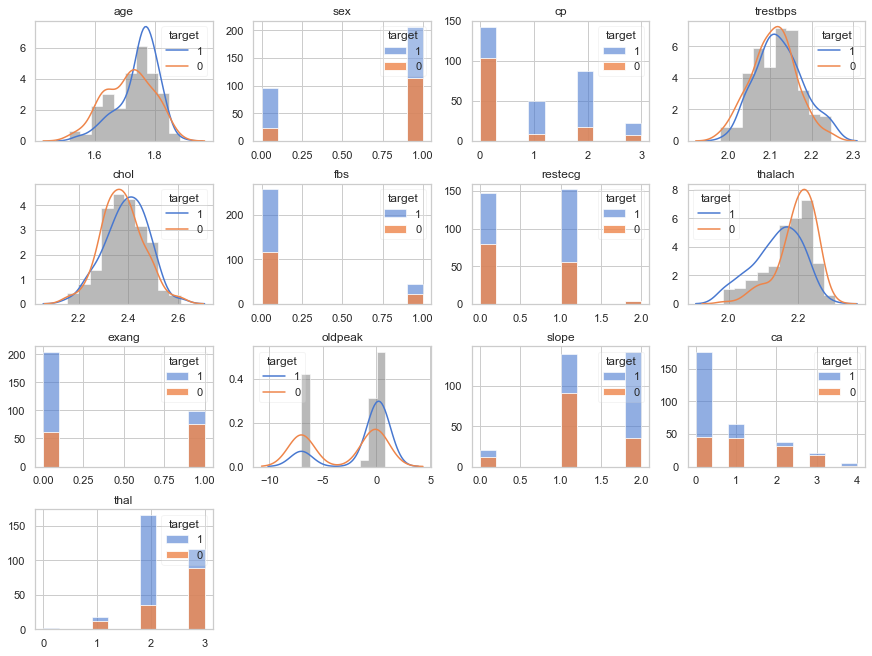

In [19]:
utl.hist(df_mix, ref='target', bins=10)

In [20]:
#df_mix[num_col] = df_mix[num_col].transform(lambda x: (x-x.mean())/x.std())

In [21]:
df_mix.groupby(df_mix['oldpeak'] > 0).oldpeak.count().to_frame()

,oldpeak
oldpeak,
False,166
True,137


In [22]:
df_mix.oldpeak = pd.qcut(df_mix.oldpeak, 3, labels=[1,2,3])

In [23]:
df_mix = pd.get_dummies(df_mix, drop_first=True).sample(frac=1, random_state=3479).reset_index(drop=True)
df_mix.head()

,age,trestbps,chol,thalach,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,1.806180,2.113943,2.481443,2.086360,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1.755875,2.041393,2.525045,2.155336,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
2,1.707570,2.113943,2.408240,2.173186,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,1.531479,2.071882,2.322219,2.283301,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
4,1.778151,2.161368,2.450249,2.152288,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [24]:
df_mix[df_mix.columns.difference(['target_1'])] = df_mix[df_mix.columns.difference(['target_1'])].transform(lambda x: (x-x.mean())/x.std())
df_mix.head()

,age,trestbps,chol,thalach,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,1.021062,-0.023511,1.155798,-1.210490,-1.465992,-0.443820,-0.633600,-0.286132,-0.416945,0.995059,...,1.077239,-0.937591,-0.521735,2.636412,-0.265402,-0.129318,-0.250897,0.906961,-0.791806,1
1,0.354762,-1.334478,1.663214,-0.214469,0.679881,-0.443820,-0.633600,-0.286132,-0.416945,0.995059,...,1.077239,-0.937591,1.910354,-0.378052,-0.265402,-0.129318,-0.250897,-1.098945,1.258768,0
2,-0.285042,-0.023511,0.303908,0.043290,-1.465992,-0.443820,1.573075,-0.286132,-0.416945,-1.001649,...,-0.925236,1.063043,-0.521735,-0.378052,-0.265402,-0.129318,-0.250897,0.906961,-0.791806,1
3,-2.617401,-0.783545,-0.697149,1.633358,-1.465992,2.245729,-0.633600,-0.286132,-0.416945,0.995059,...,-0.925236,1.063043,-0.521735,-0.378052,-0.265402,-0.129318,-0.250897,0.906961,-0.791806,1
4,0.649816,0.833437,0.792786,-0.258478,0.679881,-0.443820,-0.633600,-0.286132,-0.416945,-1.001649,...,1.077239,-0.937591,-0.521735,2.636412,-0.265402,-0.129318,-0.250897,-1.098945,1.258768,0


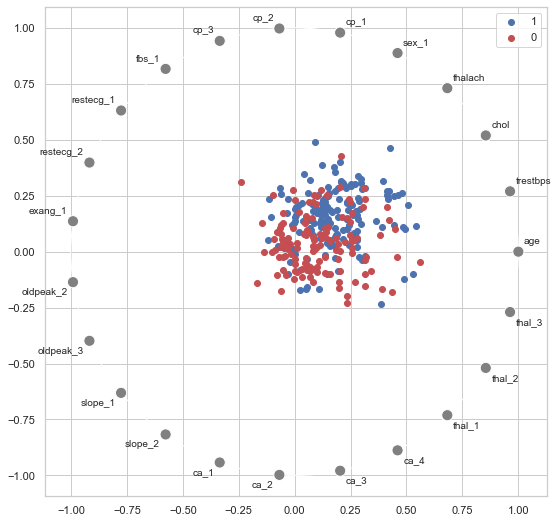

In [25]:
plt.figure(figsize=(9,9))
pd.plotting.radviz(df_mix, 'target_1', color=('b','r'));

In [26]:
log_reg = Reg(target='target_1', l_rate=.5, reg_rate=2.5, beta=.5, stop=3e-3)

In [27]:
X_train, y_train, X_test, y_test = log_reg.split(df_mix, cutoff=.8)

In [28]:
log_reg.fit(X_train, y_train, reset=True).predict(X_test);

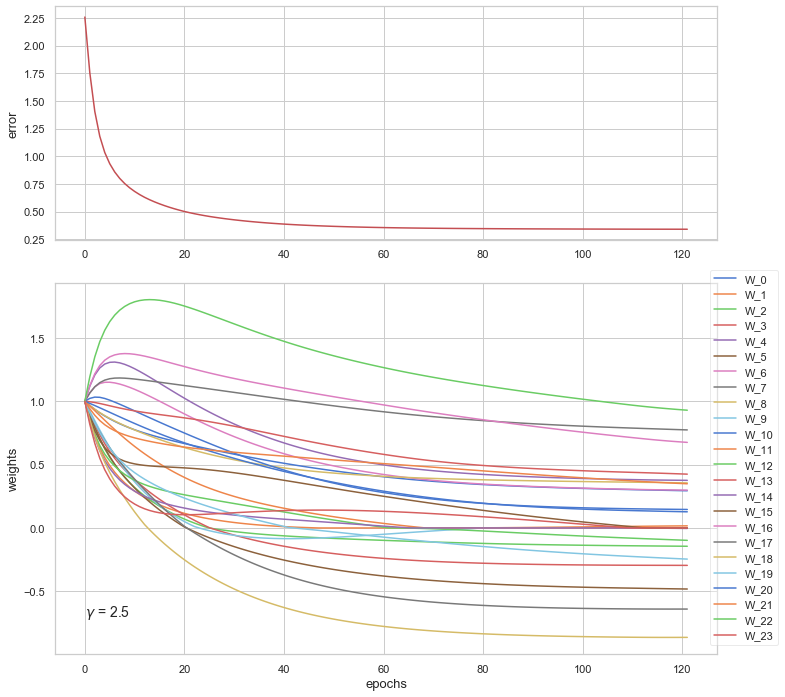

In [29]:
log_reg.graph()

In [30]:
log_reg.weights

,features,weights
0,bias,0.293728
1,age,0.016776
2,trestbps,-0.144249
3,chol,-0.295080
4,thalach,0.375947
5,sex_1,-0.481664
6,cp_1,0.298757
7,cp_2,0.773787
8,cp_3,0.355520
9,fbs_1,0.000000


In [31]:
log_reg.metrics(y_test)

Accuracy: 0.9016393442622951
Precision: 0.8809523788548753
Recall: 0.9736842079639889
F1 score: 0.9249999478125026



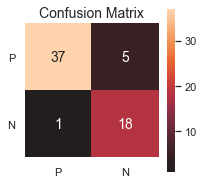

In [32]:
log_reg.confusion_matrix

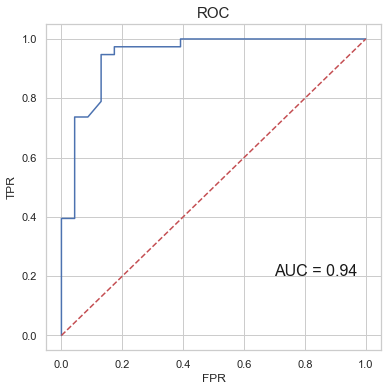

In [33]:
log_reg.ROC

Accuracy: 0.8745874587458746
Precision: 0.8587570616617192
Recall: 0.9212121206538109
F1 score: 0.8888888883690708



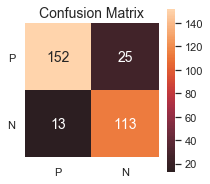

In [34]:
#%%timeit
log_reg.cross_val(df_mix, folds=101)

In [35]:
X_mix, y_mix, _, _ = log_reg.split(df_mix, cutoff=1.)

In [36]:
log_reg.predict(X_mix).metrics(y_mix)

Accuracy: 0.8811881188118812
Precision: 0.8728323694376692
Recall: 0.9151515145968779
F1 score: 0.8934910737596751



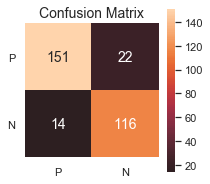

In [37]:
log_reg.confusion_matrix

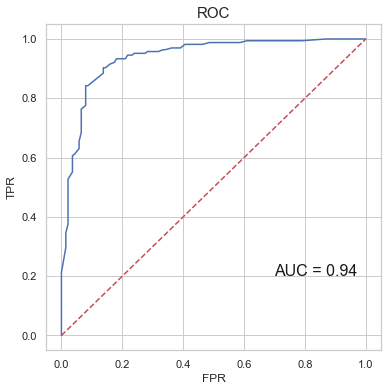

In [38]:
log_reg.ROC